# networkx库基本功能测试
---
networkx 是python的图论库，包含了图的结构以及一些基本算法，并且可以配合matplotlib绘制图

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [90]:
G =nx.Graph() #创建图对象
G=G.to_directed()

In [91]:
G.add_node(4)
G.add_nodes_from([1,2,3,4,5,6]) #重复添加的node不会被多次添加
G.node

NodeView((4, 1, 2, 3, 5, 6))

In [92]:
G.add_node('hello')
G.node

NodeView((4, 1, 2, 3, 5, 6, 'hello'))

In [93]:
G.add_nodes_from('hello')
G.node

NodeView((4, 1, 2, 3, 5, 6, 'hello', 'h', 'e', 'l', 'o'))

In [94]:
G.node

NodeView((4, 1, 2, 3, 5, 6, 'hello', 'h', 'e', 'l', 'o'))

In [95]:
G.add_edge('hello',1)
G.add_edge(4,2)
G.add_edge(4,3)
G.add_edges_from([(1,2),(3,4),(5,6),('h','o')])

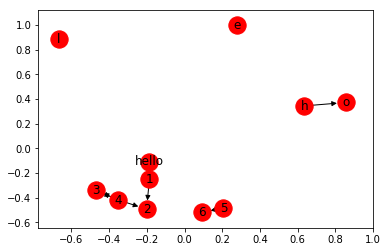

In [96]:
nx.draw_networkx(G)
plt.show()

In [149]:
r = nx.Graph()
r = r.to_directed

In [263]:
def random_graph(v_num=10, e_num=20,direction=True):
    G = nx.Graph()
    if direction:
        G=G.to_directed()
    G.add_nodes_from(range(v_num))
    #max_e_num = e_num if e_num<=v_num*v_num else v_num*v_num
    edges = [(random.randint(0,v_num-1),random.randint(0,v_num-1)) for i in range(e_num)]
    G.add_edges_from(edges)
    return G

In [319]:
G = random_graph(10,10)

In [320]:
for s in nx.kosaraju_strongly_connected_components(G):
    print(s)

{3}
{2}
{4, 5, 6, 7, 8, 9}
{1}
{0}


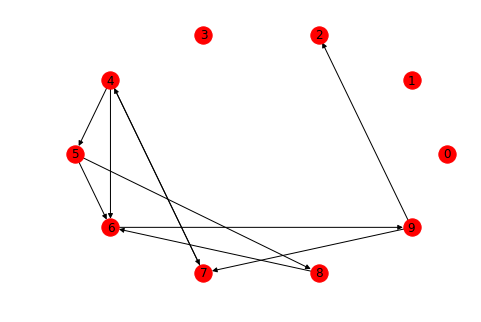

In [321]:
nx.draw_circular(G,with_labels=True)
plt.show()

In [322]:
list(G.successors(5))

[6, 8]

In [336]:
def reverse_Graph(G):
    rG = nx.DiGraph()
    rG.add_nodes_from(G.nodes)
    for f,t in G.edges:
        rG.add_edge(t,f)
    return rG
    
def DFS(G,node,stack,visited):
    #print(node)
    if visited[node]:
        return
    visited[node]=True
    for v in list(G.successors(node)):
        DFS(G,v,stack,visited)
    stack.append(node)
    return
    
def my_strong_connect(G):
    visited = [False for x in range(G.number_of_nodes())]
    stack = []
    for v in range(G.number_of_nodes()):
        DFS(G,v,stack,visited)
    
    strong_connect = []
    r_G = reverse_Graph(G)
    r_visited = [False for x in range(G.number_of_nodes())]
    stack.reverse()
    for v in stack:
        if r_visited[v]:
            continue
        s = []
        DFS(r_G,v,s,r_visited)
        strong_connect.append(s)
    return strong_connect

In [345]:
G = random_graph(20,80)
print(my_strong_connect(G))
print(list(nx.kosaraju_strongly_connected_components(G)))

***********************
[[12, 13, 11, 15, 18, 8, 4, 5, 7, 19, 2, 9, 1, 16, 6, 3, 10, 0], [14], [17]]
[{17}, {14}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19}]


In [328]:
for s in G.successors(3):
    print(s)

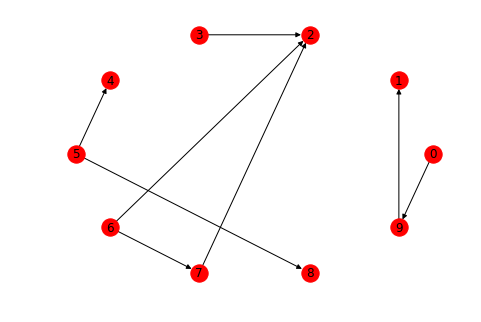

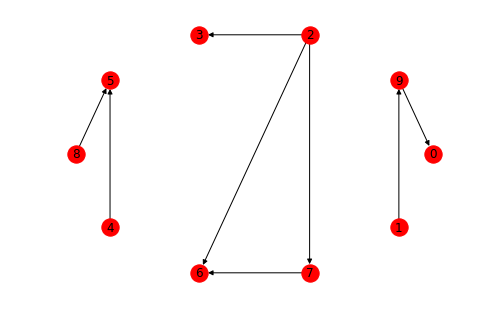

In [302]:
rG = reverse_Graph(G)
nx.draw_circular(G,with_labels=True)
plt.show()
nx.draw_circular(rG,with_labels=True)
plt.show()

In [316]:
l = list(range(10))
l.reverse()
l

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [333]:
G.edges

OutEdgeView([(4, 6), (4, 7), (4, 5), (5, 6), (5, 8), (6, 9), (7, 4), (8, 6), (9, 2), (9, 7)])